In [57]:
import os
import time
import numpy as np
import pandas as pd
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [118]:
train = pd.read_csv("Dataset/train.csv")
test = pd.read_csv("Dataset/test.csv")

In [119]:
train.head()

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),DEFCON_Level,ID
0,16,1,0.67,3,6.0,25.0,0.787812,324.36,1,862400.0,3,7570
1,8,1,0.11,2,38.0,48.0,0.419236,359.34,0,959200.0,4,12128
2,9,1,0.49,3,32.0,69.0,0.582232,332.84,1,836000.0,3,2181
3,7,0,0.30,2,31.0,52.0,0.589574,358.28,1,924000.0,3,5946
4,8,1,0.12,5,13.0,42.0,0.552863,364.64,0,968000.0,2,9054


In [120]:
train.set_index("ID")

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),DEFCON_Level
ID,,,,,,,,,,,
7570,16,1,0.67,3,6.0,25.0,0.787812,324.36,1,862400.0,3
12128,8,1,0.11,2,38.0,48.0,0.419236,359.34,0,959200.0,4
2181,9,1,0.49,3,32.0,69.0,0.582232,332.84,1,836000.0,3
5946,7,0,0.30,2,31.0,52.0,0.589574,358.28,1,924000.0,3
9054,8,1,0.12,5,13.0,42.0,0.552863,364.64,0,968000.0,2
...,...,...,...,...,...,...,...,...,...,...,...
11493,11,1,0.49,5,5.0,13.0,0.919971,329.66,1,1029600.0,4
305,10,0,0.52,2,14.0,28.0,0.433921,348.74,1,1047200.0,3
612,7,1,0.13,2,25.0,42.0,0.470631,366.76,1,941600.0,3


In [121]:
test.head()

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),ID
0,8,0,0.52,2,19.0,52.0,0.376652,319.06,1,976800.0,1
1,9,0,0.44,2,6.0,12.0,0.254772,351.92,1,1082400.0,10
2,8,0,0.44,3,7.0,18.0,0.472100,349.80,1,924000.0,14
3,10,0,0.39,2,3.0,13.0,0.478708,343.44,1,1003200.0,17
4,9,0,0.44,2,6.0,14.0,0.561674,346.62,1,924000.0,21


In [122]:
test.set_index("ID")

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands)
ID,,,,,,,,,,
1,8,0,0.52,2,19.0,52.0,0.376652,319.06,1,976800.0
10,9,0,0.44,2,6.0,12.0,0.254772,351.92,1,1082400.0
14,8,0,0.44,3,7.0,18.0,0.472100,349.80,1,924000.0
17,10,0,0.39,2,3.0,13.0,0.478708,343.44,1,1003200.0
21,9,0,0.44,2,6.0,14.0,0.561674,346.62,1,924000.0
...,...,...,...,...,...,...,...,...,...,...
12484,8,1,0.27,3,5.0,77.0,0.552863,338.14,1,827200.0
12487,7,1,0.03,3,7.0,15.0,0.588106,363.58,1,827200.0
12488,10,1,0.25,3,33.0,151.0,0.626285,334.96,1,809600.0


In [123]:
def make_bool(df,column):
    df[column] = np.where(df[column]>1,1,df[column])
    return df
    

In [124]:
train = make_bool(train,"Diplomatic_Meetings_Set")
train = make_bool(train,"Aircraft_Carriers_Responding")
test = make_bool(test,"Diplomatic_Meetings_Set")
test = make_bool(test,"Aircraft_Carriers_Responding")


In [125]:
label = train["DEFCON_Level"]
train = train.drop(columns="DEFCON_Level")


In [126]:
label = label.apply(lambda x: x-1)

In [127]:
label.value_counts()

1    4270
2    3910
3    1212
0     498
4     110
Name: DEFCON_Level, dtype: int64

In [128]:
X_train, X_test, y_train, y_test = train_test_split(train, label, random_state=42)

In [129]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test,label=y_test)


In [70]:
params = {
    'objective': 'multi:softmax',
    'num_class': 5,
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,

}

In [88]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=1000,
    seed=42,
    nfold=5,
    metrics=["mlogloss"],
    early_stopping_rounds=10
)

In [90]:
cv_results["test-mlogloss-mean"].min()

0.893071

In [91]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(1,12)
    for min_child_weight in range(1,10)
]

In [99]:
# Define initial best params and MAE
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=1000,
        seed=42,
        nfold=5,
      metrics={"mlogloss"},
        early_stopping_rounds=10
    )    # Update best MAE
    mean_mae = cv_results['test-mlogloss-mean'].min()
    boost_rounds = cv_results['test-mlogloss-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with max_depth=0.7, min_child_weight=0.7


XGBoostError: Invalid Parameter format for max_depth expect int but value='0.7'

In [101]:
params['max_depth'] = 11
params['min_child_weight'] = 5

In [102]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

min_mae = float("Inf")
best_params = None# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=1000,
        seed=42,
        nfold=5,
        metrics={"mlogloss"},
        early_stopping_rounds=10
    )    # Update best score
    mean_mae = cv_results["test-mlogloss-mean"].min()
    boost_rounds = cv_results["test-mlogloss-mean"].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
        
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with subsample=1.0, colsample=1.0
	MAE 0.8632496 for 16 rounds
CV with subsample=1.0, colsample=0.9
	MAE 0.8780395999999999 for 19 rounds
CV with subsample=1.0, colsample=0.8
	MAE 0.8906865999999999 for 21 rounds
CV with subsample=1.0, colsample=0.7
	MAE 0.9024654 for 24 rounds
CV with subsample=0.9, colsample=1.0
	MAE 0.8760328000000002 for 18 rounds
CV with subsample=0.9, colsample=0.9
	MAE 0.8915027999999999 for 18 rounds
CV with subsample=0.9, colsample=0.8
	MAE 0.897902 for 19 rounds
CV with subsample=0.9, colsample=0.7
	MAE 0.9028392000000001 for 22 rounds
CV with subsample=0.8, colsample=1.0
	MAE 0.8803158 for 17 rounds
CV with subsample=0.8, colsample=0.9
	MAE 0.8916433999999999 for 18 rounds
CV with subsample=0.8, colsample=0.8
	MAE 0.904763 for 19 rounds
CV with subsample=0.8, colsample=0.7
	MAE 0.9113216000000002 for 19 rounds
CV with subsample=0.7, colsample=1.0
	MAE 0.8925103999999999 for 19 rounds
CV with subsample=0.7, colsample=0.9
	MAE 0.9009592 for 18 rounds
CV wit

In [103]:
params['subsample'] = 1
params['colsample_bytree'] = 1

In [106]:
%time 
# This can take some time…
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))    # We update our parameters
    params['eta'] = eta    # Run and time CV
    %time cv_results = xgb.cv(
            params,
            dtrain,
            num_boost_round=1000,
            seed=42,
            nfold=5,
            metrics={"mlogloss"},
            early_stopping_rounds=10
          )    # Update best score
    mean_mae = cv_results["test-mlogloss-mean"].min()
    boost_rounds = cv_results["test-mlogloss-mean"].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))

CPU times: user 11 µs, sys: 0 ns, total: 11 µs
Wall time: 20.5 µs
CV with eta=0.3
CPU times: user 10 µs, sys: 0 ns, total: 10 µs
Wall time: 20 µs
	MAE 0.8632496 for 16 rounds

CV with eta=0.2
CPU times: user 11 µs, sys: 0 ns, total: 11 µs
Wall time: 20.7 µs
	MAE 0.861632 for 28 rounds

CV with eta=0.1
CPU times: user 11 µs, sys: 0 ns, total: 11 µs
Wall time: 21.2 µs
	MAE 0.857744 for 56 rounds

CV with eta=0.05
CPU times: user 11 µs, sys: 0 ns, total: 11 µs
Wall time: 21.2 µs
	MAE 0.8553388 for 115 rounds

CV with eta=0.01
CPU times: user 11 µs, sys: 0 ns, total: 11 µs
Wall time: 21.2 µs
	MAE 0.8545988 for 587 rounds

CV with eta=0.005
CPU times: user 11 µs, sys: 0 ns, total: 11 µs
Wall time: 21 µs
	MAE 0.8568610000000001 for 999 rounds

Best params: 0.01, MAE: 0.8545988


In [110]:
params['eta'] = .01
params['eval_metric'] = "mlogloss"

In [130]:
bst = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10,
)

[0]	Test-mlogloss:1.59961
Will train until Test-mlogloss hasn't improved in 10 rounds.
[1]	Test-mlogloss:1.58989
[2]	Test-mlogloss:1.58037
[3]	Test-mlogloss:1.57107
[4]	Test-mlogloss:1.56195
[5]	Test-mlogloss:1.55300
[6]	Test-mlogloss:1.54421
[7]	Test-mlogloss:1.53558
[8]	Test-mlogloss:1.52709
[9]	Test-mlogloss:1.51878
[10]	Test-mlogloss:1.51062
[11]	Test-mlogloss:1.50238
[12]	Test-mlogloss:1.49430
[13]	Test-mlogloss:1.48636
[14]	Test-mlogloss:1.47856
[15]	Test-mlogloss:1.47091
[16]	Test-mlogloss:1.46343
[17]	Test-mlogloss:1.45599
[18]	Test-mlogloss:1.44870
[19]	Test-mlogloss:1.44147
[20]	Test-mlogloss:1.43445
[21]	Test-mlogloss:1.42748
[22]	Test-mlogloss:1.42067
[23]	Test-mlogloss:1.41394
[24]	Test-mlogloss:1.40728
[25]	Test-mlogloss:1.40079
[26]	Test-mlogloss:1.39434
[27]	Test-mlogloss:1.38802
[28]	Test-mlogloss:1.38185
[29]	Test-mlogloss:1.37572
[30]	Test-mlogloss:1.36963
[31]	Test-mlogloss:1.36370
[32]	Test-mlogloss:1.35790
[33]	Test-mlogloss:1.35228
[34]	Test-mlogloss:1.34661
[35]

[295]	Test-mlogloss:0.87562
[296]	Test-mlogloss:0.87521
[297]	Test-mlogloss:0.87487
[298]	Test-mlogloss:0.87449
[299]	Test-mlogloss:0.87413
[300]	Test-mlogloss:0.87376
[301]	Test-mlogloss:0.87340
[302]	Test-mlogloss:0.87308
[303]	Test-mlogloss:0.87274
[304]	Test-mlogloss:0.87240
[305]	Test-mlogloss:0.87207
[306]	Test-mlogloss:0.87173
[307]	Test-mlogloss:0.87141
[308]	Test-mlogloss:0.87106
[309]	Test-mlogloss:0.87071
[310]	Test-mlogloss:0.87040
[311]	Test-mlogloss:0.87010
[312]	Test-mlogloss:0.86976
[313]	Test-mlogloss:0.86942
[314]	Test-mlogloss:0.86912
[315]	Test-mlogloss:0.86881
[316]	Test-mlogloss:0.86847
[317]	Test-mlogloss:0.86816
[318]	Test-mlogloss:0.86785
[319]	Test-mlogloss:0.86751
[320]	Test-mlogloss:0.86719
[321]	Test-mlogloss:0.86682
[322]	Test-mlogloss:0.86650
[323]	Test-mlogloss:0.86618
[324]	Test-mlogloss:0.86591
[325]	Test-mlogloss:0.86560
[326]	Test-mlogloss:0.86528
[327]	Test-mlogloss:0.86496
[328]	Test-mlogloss:0.86466
[329]	Test-mlogloss:0.86433
[330]	Test-mlogloss:

[588]	Test-mlogloss:0.83206
[589]	Test-mlogloss:0.83203
[590]	Test-mlogloss:0.83198
[591]	Test-mlogloss:0.83193
[592]	Test-mlogloss:0.83191
[593]	Test-mlogloss:0.83187
[594]	Test-mlogloss:0.83181
[595]	Test-mlogloss:0.83178
[596]	Test-mlogloss:0.83174
[597]	Test-mlogloss:0.83173
[598]	Test-mlogloss:0.83170
[599]	Test-mlogloss:0.83165
[600]	Test-mlogloss:0.83161
[601]	Test-mlogloss:0.83159
[602]	Test-mlogloss:0.83157
[603]	Test-mlogloss:0.83155
[604]	Test-mlogloss:0.83150
[605]	Test-mlogloss:0.83148
[606]	Test-mlogloss:0.83143
[607]	Test-mlogloss:0.83141
[608]	Test-mlogloss:0.83138
[609]	Test-mlogloss:0.83135
[610]	Test-mlogloss:0.83130
[611]	Test-mlogloss:0.83128
[612]	Test-mlogloss:0.83125
[613]	Test-mlogloss:0.83122
[614]	Test-mlogloss:0.83120
[615]	Test-mlogloss:0.83116
[616]	Test-mlogloss:0.83112
[617]	Test-mlogloss:0.83110
[618]	Test-mlogloss:0.83105
[619]	Test-mlogloss:0.83104
[620]	Test-mlogloss:0.83103
[621]	Test-mlogloss:0.83100
[622]	Test-mlogloss:0.83098
[623]	Test-mlogloss:

In [131]:
dtest1 = xgb.DMatrix(data=X_test)
dtest_pred = bst.predict(dtest1) + 1

In [132]:
y_test = y_test+1

In [133]:
def get_clasification_report():
    named_tuple = time.localtime()
    time_string = time.strftime("%m-%d-%Y_%H:%M:%S", named_tuple)
    classification_report1 = classification_report(y_test, dtest_pred,output_dict=True)
    classification_report1 = pd.DataFrame(classification_report1)
    classification_report1.to_csv('reports/reporte-'+time_string+'.csv',index=False)
    return classification_report1

In [134]:
get_clasification_report()

,1,2,3,4,5,accuracy,macro avg,weighted avg
precision,0.326087,0.696996,0.577465,0.547511,0.0,0.6252,0.429612,0.605201
recall,0.120968,0.752549,0.647368,0.385350,0.0,0.6252,0.381247,0.625200
f1-score,0.176471,0.723708,0.610422,0.452336,0.0,0.6252,0.392587,0.609879
support,124.000000,1079.000000,950.000000,314.000000,33.0,0.6252,2500.000000,2500.000000


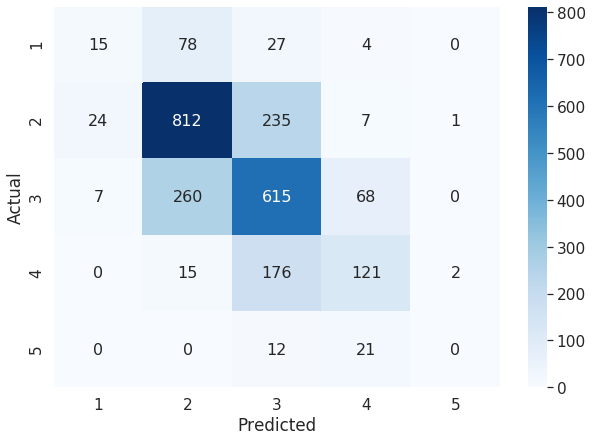

In [135]:
data = confusion_matrix(y_test, dtest_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='d')# font size


In [138]:
y_test.value_counts()

2    1079
3     950
4     314
1     124
5      33
Name: DEFCON_Level, dtype: int64

In [139]:
def make_pred(test):
    ids = test["ID"].values
    
    test = xgb.DMatrix(data=test)
    pred = bst.predict(test)

    pred = pd.DataFrame({'ID':ids,'DEFCON_Level':pred})
    pred["DEFCON_Level"] = pred["DEFCON_Level"].apply(lambda x: x+1)
    return pred

In [140]:
def save_prediction(pred):
    named_tuple = time.localtime() # get struct_time
    time_string = time.strftime("%m-%d-%Y_%H:%M:%S", named_tuple)
    
    try:
        os.mkdir('predictions')
    except:
        pass
    
    pred.to_csv('predictions/submit-'+time_string+'.csv',index=False)

In [141]:
pred = make_pred(test)
save_prediction(pred)